Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 00: Preparation

## Introduction

This is an introductory exercise sheet that shall help you getting started with Python and Jupyter Notebooks, the tools we will use in the practice sessions of the Computer Vision course. This is a preparatory sheet and you are not required to submit your solutions.

We encourage you to work through this sheet to make sure you get familiar with this setup and to check if you feel comfortable with reading and understanding the documentation of the software packages.

In case of questions, feel free to post them to the forum and/or raise them in the next practice session.

## Assignment 0: Check your installation
Check that your installation succeeded and all required packages are available by executing the following cell (type <kbd>Ctrl</kbd>+<kbd>&#x23ce;</kbd>, on German keyboards <kbd>Strg</kbd>+<kbd>&#x23ce;</kbd>, or press the "run cell"-button at the toolbar above). Seeing no output (no complains) means that your environment seems fine:

In [ ]:
import importlib
assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'
assert importlib.util.find_spec('imageio') is not None , 'imageio not found'
assert importlib.util.find_spec('scipy') is not None , 'scipy not found'

## Remarks:

* If you experience any troubles, ask your fellow students or send us an e-mail - we are always happy to help.
* If you do not want to use Python to do the exercises, but prefer another programming language, you may ask the tutors if they are willing to support it. However, the practice sessions will focus on Python and will probably not cover other languages.

## Assignment 1: Image I/O

`imageio` is a Python library that provides an easy interface to read and write a wide range of image data. The goal of this exercise is to get familiar with different ways of obtaining images for further processing.

**a) Example images:** `imageio` provides a number of example images, which can be loaded by the special URI `imageio:`. These include classic 2D images, as well as animated and volumetric images. 

Find out what other images are provided and how these are represented when loaded as numpy array.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio.v2 as imageio

filename = 'chelsea.png'

### BEGIN SOLUTION
# The imageio documenation lists in section "2.5 Imageio standard images"
# the available images:
#filename = 'chelsea.bsdf'  # The chelsea.png in a BSDF file(for testing)
#filename =  'newtonscradle.gif' # Animated GIF of a newton’s cradle
#filename =  'cockatoo.mp4'  # Video file of a cockatoo
#filename =  'stent.npz'  # Volumetric image showing a stented abdominal aorta
#filename =  'astronaut.png'  # Image of the astronaut Eileen Collins
#filename =  'camera.png'  # Classic grayscale image of a photographer
#filename =  'checkerboard.png'  # Black and white image of a chekerboard
#filename =  'chelsea.png'  # Image of Stefan’s cat
#filename =  'clock.png'  # Photo of a clock with motion blur (Stefan van der Walt)
#filename =  'coffee.png'  # Image of a cup of coffee (Rachel Michetti)
#filename =  'coins.png'  # Image showing greek coins from Pompeii
#filename =  'horse.png'  # Image showing the silhouette of a horse (Andreas Preuss)
#filename =  'hubble_deep_field.png'  # Photograph taken by Hubble telescope (NASA)
#filename =  'immunohistochemistry.png' # Immunohistochemical (IHC) staining
#filename =  'moon.png'  # Image showing a portion of the surface of the moon
#filename =  'page.png'  # A scanned page of text
#filename =  'text.png'  # A photograph of handdrawn text
#filename =  'wikkie.png'  # Image of Almar’s cat
#filename =  'chelsea.zip'  # The chelsea.png in a zipfile (for testing)
# this list is also available at
# https://imageio.readthedocs.io/en/stable/standardimages.html
### END SOLUTION

im =  imageio.imread('imageio:' + filename)

plt.figure()
plt.title(f"{filename}: {im.shape}")
plt.imshow(im)
plt.show()

**(b) Loading an image from a file**. Usually, you will have to load images from a file. We have uploaded an example image to the StudIP folder along with this exercise sheet. Load that image using the `imageio` library.

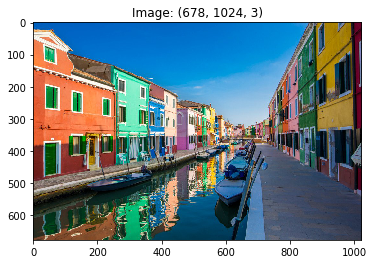

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

### BEGIN SOLUTION
import imageio

im = imageio.imread("example.jpg")
### END SOLUTION

plt.figure()
plt.title(f"Image: {im.shape}")
plt.imshow(im)
plt.show()

**(c) Download an image from the web**. `imageio` also allows to load images from arbitrary URLs. Download an image from a URL of your choice and display it.

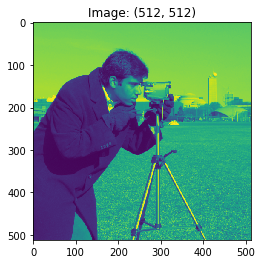

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio

### BEGIN SOLUTION
im = imageio.imread("https://github.com/imageio/imageio-binaries/raw/master/images/camera.png")

plt.figure()
plt.title(f"Image: {im.shape}")
plt.imshow(im)
plt.show()
### END SOLUTION

**(d) Storing image as file.** The function `imageio.imwrite()` can be used to store images on your harddrive. Mark the head of the cameraman with a rectangle and store the resulting image in a file. Check the saved image with some external program.

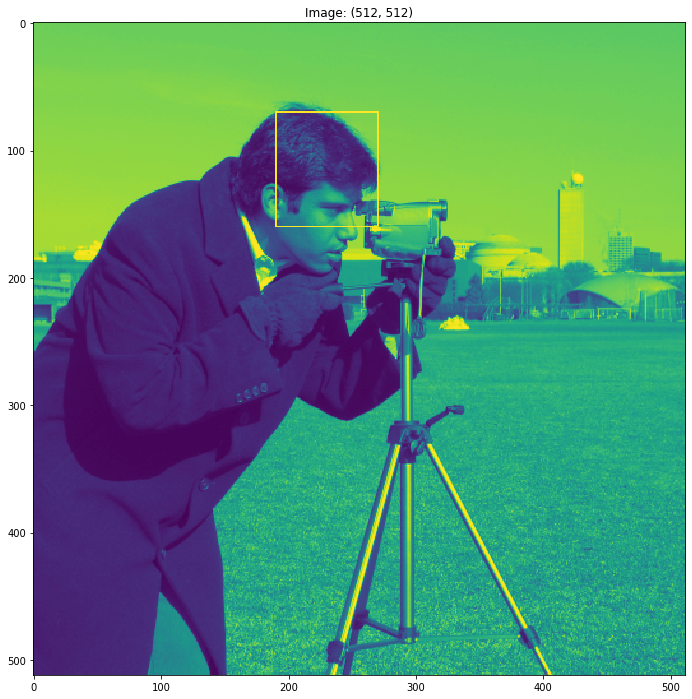

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio

im =  imageio.imread('imageio:camera.png')

### BEGIN SOLUTION
x1, x2 = 190,270
y1, y2 = 70,160
box = 255
im[(y1,y2),x1:x2] = box
im[y1:y2,(x1,x2)] = box

imageio.imwrite('example.png', im)
### END SOLUTION

plt.figure(figsize=(12,12))
plt.title(f"Image: {im.shape}")
plt.imshow(im)
plt.show()

**(e) Acquire image from webcam (bonus)** `imageio` also allows to acquire images from a webcam. However, accessing the webcam relies on external software and requires that your operating system grants access to the webcam. Try to make the following cell work!

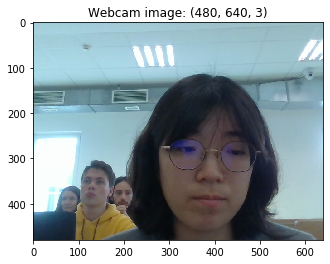

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio

reader = imageio.get_reader('<video0>')
im = reader.get_next_data()

# with imageio.get_reader('<video0>') as reader;
#     im = reader.get_next_data()

plt.figure()
plt.title(f"Webcam image: {im.shape}")
plt.imshow(im)
plt.show()

## Assignment 2: Displaying images
In exercises and during the practice sessions, we will make extensive use of `matplotlib`'s `imshow` function for displaying images. Properly understanding the details of how this function works is essential to avoid problems later on. Take a close look at the documentation and then answer the following questions:

**(a) Origin:** The default behaviour of `imshow` is to display the origin (the point with coordinates (0,0)) at the upper left corner. How can you change this to the lower left corner (as it is usually done in mathematical contexts when displaying graphs)?

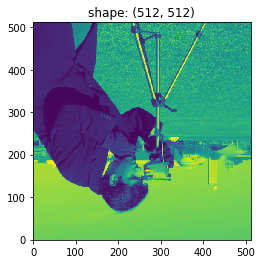

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio

im = imageio.imread("imageio:camera.png")

plt.figure()
plt.title(f"shape: {im.shape}")
### BEGIN SOLUTION
plt.imshow(im, origin='lower')
### END SOLUTION
plt.show()

**(b) Monochrome images:** When displaying monochrome images (that is 2-dimensional arrays), they will by default not be displayed as grayscale by `imshow` but rather appear yellow-greenish. Explain why this is the case and how you can achieve  grayscale output.

Matplotlib displays monochrome images using a colormap (see [Matplotlib documentation: colormaps](https://matplotlib.org/gallery/color/colormap_reference.html)), mapping values present in the image to the colors of the colormap. The default colormap (`plt.rcParams['image.cmap']`) is `'viridis'`. To obtain a gray scale image, you have to use the colormap `'gray'`. There are different ways to achieve this.

viridis


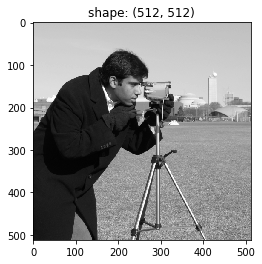

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio

im = imageio.imread("imageio:camera.png")

plt.figure()
plt.title(f"shape: {im.shape}")
### BEGIN SOLUTION
print(plt.rcParams['image.cmap'])
plt.gray()
### END SOLUTION
plt.imshow(im)
plt.show()

**(c) interpolation:** Demonstrate the effect of the `interpolation=` parameter on a small (e.g. $4\times 4$) image. Discuss in what situations you would use which interpolation technique.

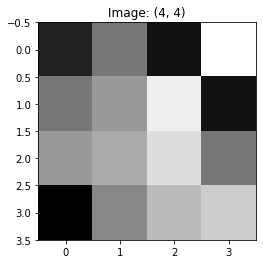

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

im = np.random.randint(0,16,(4,4))

plt.figure()
plt.title(f"Image: {im.shape}")
plt.imshow(im, interpolation="none")
plt.show()

**(d)** Consider the following example: Two images are created, one with values in the range $[0,128[$, the other with values in the range $[0,256[$. Yet both images appear identical when displayed with `imshow`. Explain this effect and what to do to make the first image appear darker.

`imshow` automatically adapts the colors used for display to the range of the images value. If you want to avoid this, you have to specify an explicit range via the `vmin` and `vmax` parameters.

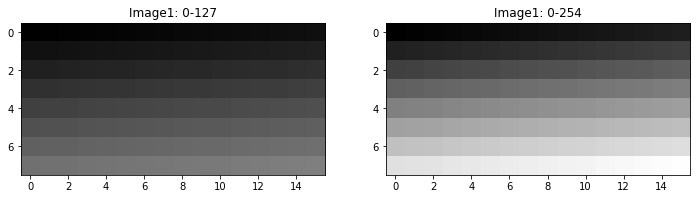

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

im1 = np.arange(0,128).reshape(8,16)
im2 = np.arange(0,256,2).reshape(8,16)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title(f"Image1: {im1.min()}-{im1.max()}")
plt.imshow(im1, vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title(f"Image1: {im2.min()}-{im2.max()}")
plt.imshow(im2, vmin=0, vmax=255)
plt.show()

**(e)** Explain in your own words the effect of the `extent=` parameter. Create a small example demonstrating the effect.

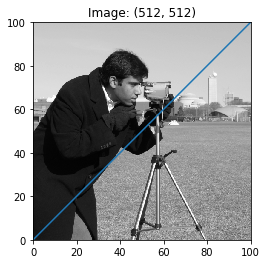

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio

im = imageio.imread("imageio:camera.png")

plt.figure()
plt.title(f"Image: {im.shape}")
### BEGIN SOLUTION
plt.imshow(im, extent=(0,100,0,100))
# plt.imshow(im)
plt.plot((0,100),(0,100))
### END SOLUTION
plt.show()